# SIMILAR MOVIE IDENTIFICATION SYSTEM

> The SIMILAR MOVIE IDENTIFICATION SYSTEM is developed at the aim of finding out the most similar movie match using Natural Language Processing techniques. This implementation that aids in identification of similar movie will help in constructing more precise recommender systems. The system is built using the cosine similarity measure by utilizing the plot summary data of various movies from wikipedia and IMDb data.

In [3]:
# import necessary packages and libraries

import os
import numpy as np
import pandas as pd
import re
import nltk

In [7]:
# load the data

movies_df = pd.read_csv('data/movies.csv')
movies_df.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [8]:
# merging plots from wikipedia and IMDb into a new column

movies_df['plot'] = movies_df['wiki_plot'].astype(str) + "\n" + movies_df['imdb_plot'].astype(str)

In [9]:
movies_df.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


### TOKENIZATION AND STEMMING

In [10]:
# import stemmer - snowball

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=False)

In [11]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=False)

def normalized(X): 
  normalized = []
  for x in X:
    words = nltk.word_tokenize(x)
    normalized.append(' '.join([stemmer.stem(word) for word in words if re.match('[a-zA-Z]+', word)]))
  return normalized

### COUNT VECTORIZATION and TF-IDF VECTORIZATION

In [12]:
# import Count and tf-idf vectorizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import FunctionTransformer

pipe = Pipeline([
  ('normalize', FunctionTransformer(normalized, validate=False)),
  ('counter_vectorizer', CountVectorizer(
    max_df=0.8, max_features=200000,
    min_df=0.2, stop_words='english',
    ngram_range=(1,3)
  )),
  ('tfidf_transform', TfidfTransformer())
])

tfidf_matrix = pipe.fit_transform([x for x in movies_df['plot']])

### COSINE SIMILARITY

In [13]:
# import metrics for cosine similarity

from sklearn.metrics.pairwise import cosine_similarity 
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

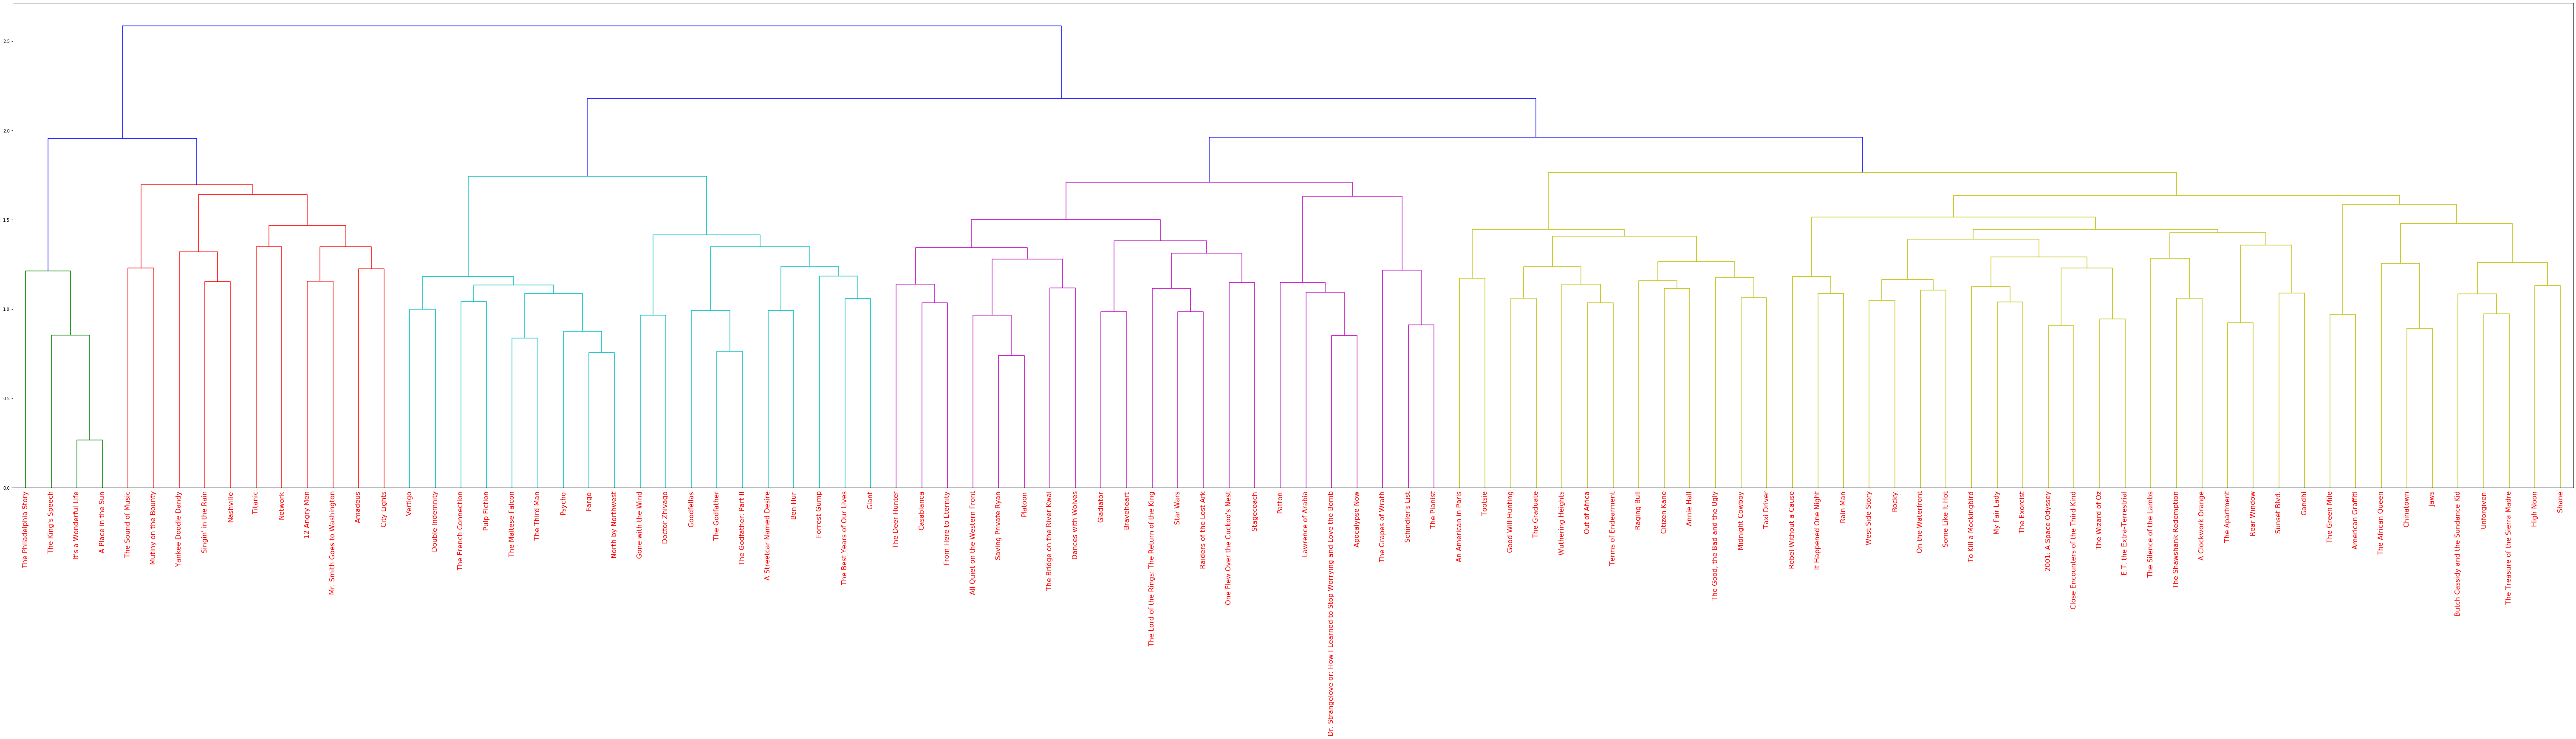

In [55]:
# create dendogram

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(similarity_distance, method='complete')
dendrogram_ = dendrogram(mergings,
               labels=[x for x in movies_df["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
              )

fig = plt.gcf()
[lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

plt.show()

In [15]:
# function for identification of similar movie

def find_similar(title):
  index = movies_df[movies_df['title'] == title].index[0]
  vector = similarity_distance[index, :]
  most_similar = movies_df.iloc[np.argsort(vector)[1], 1]
  return most_similar

print(find_similar('Good Will Hunting'))

The Graduate


### I hope you found it insightful! Thankyou for looking at my work!